In [146]:
import numpy as np
# from ipywidgets import *
# import matplotlib
# %matplotlib notebook
import matplotlib.pyplot as plt

In [147]:
# AMBIGUITY
def range_amb(Rn, Rf, pri):
    return (2*Rf/c <= (2*Rn/c) + pri)

def azi_amb(pri, swath, theta, vs, antenna_azi):
    return (pri >= 2*swath*np.sin(theta)/c)&(pri<=antenna_azi/(2*vs))
#  Avoiding Nadir Echo
def antenna_H(R, prf, lamda, Rn, theta):
    return (R >= (2*lamda*prf*Rn*np.tan(theta)/c))

def prf_select(j,Rn, Rf, tp, tpt, R, prf):
    return (prf >= (j/((2*Rn/c) - tp - tpt - (2*R/c))))&(prf >= ((j+1)/((2*Rf/c) - tp - tpt - (2*R/c))))


In [148]:
def db2mag(x):
    return np.power(10,(x/10))
def mag2db(y):
    return 10*np.log10(y)

In [149]:
# orital parameters
h = 400e+03 # obital height (m)
G = 6.6743e-11 # Gravitational Constant (SI)
Re = 6.3781e+06 # radius of earth (m)
Me = 5.97219e+24 # mass of the earth (kgs)

In [150]:
vs = np.sqrt(G*Me/(h+Re)) # orbital speed of Satellite @ h
print("velocity of the satellite  = %0.3f" % (vs/1000), "km/s")

velocity of the satellite  = 7.669 km/s


In [151]:
# Constants
c = 2.99e8 # speed of light (m/s)
kb = 1.38e-23 # boltzmann constant

In [152]:
fc = 5.5e9 # carier frequency (Hz)
bw = 200e6 # baseband bandwidth (hz)
wo = 2*np.pi*bw # radian/s baseband
# snr = 16 # recived signal to noise ratio (db)
k = wo/c # wavenumber (for both path)
lamda = 2*np.pi/k # wavelength
wc = np.pi*2*fc # radian/s carrier 
swath = 40e03 

In [153]:
Se = 510.1e06 # million sq km
t_1s_coverage = swath*vs/1e6 # 1 sec coverage sq km
t_coverage = Se/(t_1s_coverage*60*60*24)
print("Total time to cover earth scan = %0.3f" %np.ceil(t_coverage), "days")

Total time to cover earth scan = 20.000 days


In [154]:
gr_range_res = 10 # Ground Range resolution (m)
azi_res = 5 # Cross Range Resolution (m)

In [155]:
range_res = c/(2*bw) # range resolution
theta = np.arcsin(c/(2*bw*gr_range_res))
lookangle = np.arcsin((Re/(Re+h))*np.sin(theta))
print("Depression angle of satellite  = %0.3f" % (theta*180/np.pi), "Degree")
print("Lookangle of satellite  = %0.3f" % (lookangle*180/np.pi), "Degree")

Depression angle of satellite  = 4.287 Degree
Lookangle of satellite  = 4.033 Degree


In [156]:
R = np.sin(theta-lookangle)*Re/np.sin(lookangle) # target slant range
print("Target slant Range = %0.3f" %(R/1000), "Km")

Target slant Range = 401.056 Km


In [157]:
thetaR = swath/(R*np.tan(theta)) # angular range 3dB beamwidth of antenna (rad)

In [158]:
La = azi_res*2 # azimuth antenna length (m)
Lr = lamda/thetaR # Range antenna length (m)
thetaA = lamda/La # angular azimuth 3dB beamwidth of antenna (rad)
print("angular range 3dB of Antenna  = %0.3f" % (thetaR*180/np.pi), "Degree")
print("angular azimuth 3dB of Antenna  = %0.3f" % (thetaA*180/np.pi), "Degree")

angular range 3dB of Antenna  = 76.234 Degree
angular azimuth 3dB of Antenna  = 8.566 Degree


In [159]:
print("Range Length Antenna  = %0.3f" % Lr, "m")
print("Azimuth Length Antenna  = %0.3f" % La, "m")
print("Area Antenna  = %0.3f" % (La*Lr), "sq. m")

Range Length Antenna  = 1.124 m
Azimuth Length Antenna  = 10.000 m
Area Antenna  = 11.236 sq. m


In [160]:
# gnd_range_res = range_res/np.sin(theta) # ground range resolution (m)
# print("Ground Range Resolution = %0.3f"% gnd_range_res, "m")

In [161]:
Xo = swath/2
Xc = np.sqrt((h**2) + (R**2) - (2*R*h*np.cos(lookangle))) # centre of the range
print("Half swath length  = %0.3f" %(Xo/1000), "km")
print("Center of target range  = %0.3f" %(Xc/1000), "km")

Half swath length  = 20.000 km
Center of target range  = 28.210 km


In [162]:
Rn = Xc-Xo # near target
Rf = Xc+Xo # far target

print("Near Range = %0.3f" %(Rn/1000), "km")
print("Far Range = %0.3f" %(Rf/1000),"km")

Near Range = 8.210 km
Far Range = 48.210 km


In [163]:
Ls = thetaA*(Xc-Xo) # synthetic aperture length (m)
ts = Ls/c # synthetic aperture time (s)
fd = 2*vs**2/(lamda*(Xc-Xo)) # doppler frequency rate (Hz)
Ba = ts*fd # azimuth bandwidth
print("synthetic aperture length = %0.3f"% Ls, "m")
print("synthetic aperture time = %0.3f"% ts,"s")
print("doppler frequency rate = %0.3f"% fd, "Hz")
print("azimuth bandwidth = %0.3f"% Ba,"rad")

synthetic aperture length = 1227.368 m
synthetic aperture time = 0.000 s
doppler frequency rate = 9582.668 Hz
azimuth bandwidth = 0.039 rad


In [164]:
k = 4 # k is greater than equal to 4 for the range and azimuth ambiguity satisfaction
antenna_area_min=k*vs*R*np.tan(theta)/c
print("Minimum Area of antenna %0.3f"% antenna_area_min, "m^2")

Minimum Area of antenna 3.084 m^2


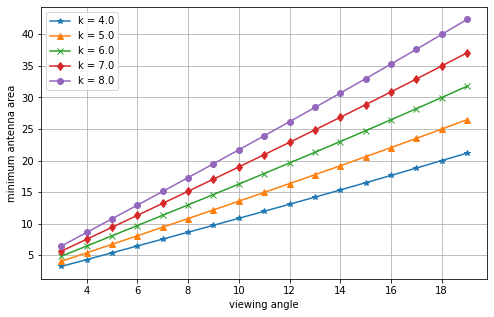

In [165]:
ki = np.linspace(4,8,5)
angle = np.arange(3,20,1)
angle = np.deg2rad(angle)
plt.figure(figsize=[8,5])
mr = ["*", "^", "x", "d", "o"]
for i in range(len(ki)):
    min_ant_area=ki[i]*lamda*vs*R*np.tan(angle)/c
    plt.plot(np.rad2deg(angle),min_ant_area, marker = mr[i])    
ki = ki.astype(str)
for i in range(len(ki)):
    ki[i] = f"k = {ki[i]}"
plt.xlabel("viewing angle")
plt.ylabel("minimum antenna area")
plt.grid(True)
plt.legend((ki.tolist()), loc = "best")
plt.show()

In [166]:
pri = 6.5e-04 # pulse repetition interval(s)
prf = 1/pri # pulse repetition frequency (Hz)
duty_cycle = 0.10 # duty cycle of transmitted signal (10 %)
Tp = duty_cycle*pri # pulse width (s) # pulse time
tpt = 0.01*Tp # protection time (1% of Pulse width)

In [167]:
Ts = 2*Rn/c # start time of recieving window
Tf = 2*Rf/c + Tp # end time of recieving window
Tx = 4*Xo/c # Range swath echo time 
print("Ts = %.3f" %(Ts*1000), "ms")
print("Tf = %.3f" %(Tf*1000), "ms")
print("Tx = %.3f" %(Tx*1000), "ms")

Ts = 0.055 ms
Tf = 0.387 ms
Tx = 0.268 ms


In [168]:
alpha = wo/Tp # chirp rate
beta = wc-alpha*Tp # modified chirp carrier
print("%0.3f"% alpha, "%0.3f"% beta)


19332877868244.879 33300882128.052


In [169]:
Peak_Power = 1.5e3 # watt
avg_power = (duty_cycle)*Peak_Power # watt
noise_bw = bw
norm_bsc = -17 # normalized backscattering constant (db)
noise_temp = 300 # in kelvin
antenna_gain = 10*np.log10((La*Lr)/(thetaR*thetaA)) # antenna gain (db)
image_pross_loss = 3 # system Loss (db)
noise_factor = 3 # noise factor (db)
path_loss = (20*np.log10(R/1e03)+20*np.log10(fc/1e06)+32.44)*2

# Noise and SNR
noise_power = mag2db(kb*noise_temp*noise_bw) # noise_bw is noise equivalent bandwidth in Hz

rec_sensitivity = -170 # recevier sensitivity (dB)

snr = (mag2db(avg_power)+(antenna_gain*2))-(
    image_pross_loss+noise_factor+path_loss+noise_power)+norm_bsc - rec_sensitivity # signal to noise ratio

nesz = -1*snr # noise equi. sigma not,  average backscattering coefficient at SNR = 0 dB

print("Average Power = %0.1f"% avg_power, "W")
print("Antenna Gain = %0.3f"% antenna_gain, "dB")
print("Path Loss = %0.3f"% (-1*path_loss), "dB")
print("Noise Power = %0.5f"% noise_power, "dB")
print("Receiver Sensitivity =", rec_sensitivity, "dB")
print("SNR = %0.5f"% snr, "dB")
print("NE sigma 0 = %0.5f"% nesz, "dB")

Average Power = 150.0 W
Antenna Gain = 17.519 dB
Path Loss = -318.623 dB
Noise Power = -120.81970 dB
Receiver Sensitivity = -170 dB
SNR = 5.99682 dB
NE sigma 0 = -5.99682 dB


In [170]:
range_amb(Rn, Rf, pri)
azi_amb(pri, swath, theta, vs, La)

True

In [171]:
azi_amb(pri, swath, theta, vs, La)

True

In [172]:
antenna_H(R, prf, lamda, Rn, theta)

True